# Model Learning


To Do: 

Andere Modelle implementieren,

Evalutaion erstellen der verschiedenen Modelle und vergleichen,

Schauen ob schon erste Testläufe mit den bereits preprocesseden daten möglich sind, 

Pipeline

Hyper Parameter Optimization

In [368]:
import pandas as pd


### Vorgehen für die Modelle

3 Modelle:

1) Modell mit Daten von 2018-heute mit allen Attributen

2) Modell mit Daten von 1996-huete nur mit Attributen die diese Daten gemeinsam haben 

3) Modell von 1950 - heute nur mit Attributen die alle Daten gemeinsam haben 


--> Ensemble Vote der 3 Modelle 

# Modell 1 

## Preprocessing

In which shape is the preprocessed data? Are additional preprocessing techniques necessary for different models ?

Is there already an train-test(-validation) split?

Binning, Boosting & stratified sampling

Encoding necessary?

In [369]:
#Modell 1

df1 = pd.read_csv('../data/processed/export_2018_full_v1.csv') #Hat nur daten von 2018-2024 ???

In [371]:
df1.head()

,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,position,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,driver,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres
0,23782,989,20,6,5,3,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.348,1:21.944,1:21.838,3.0,1987-07-03,German,VET,21787.0,21787.0,21787.0,0.0,1.0,1.0,26.0,26.0,26.0,0.0,235976.200000,37075.632937,136768.016807,24639.648649,235976.2,235976.2,235976.2,25191.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23783,989,1,131,44,1,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:22.824,1:22.051,1:21.164,1.0,1985-01-07,British,HAM,21821.0,21821.0,21821.0,0.0,1.0,1.0,19.0,19.0,19.0,0.0,33408.959596,174568.428571,119521.000000,85900.376467,235561.8,235561.8,235561.8,85900.376467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23784,989,8,6,7,2,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.096,1:22.507,1:21.828,2.0,1979-10-17,Finnish,RAI,21421.0,21421.0,21421.0,0.0,1.0,1.0,18.0,18.0,18.0,0.0,175877.714286,35074.477528,195292.316667,24391.540000,236755.2,236755.2,236755.2,30961.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23785,989,817,9,3,8,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.494,1:22.897,1:22.152,5.0,1989-07-01,Australian,RIC,21440.0,21440.0,21440.0,0.0,1.0,1.0,26.0,26.0,26.0,0.0,112315.376106,75383.610338,137356.063927,24578.241758,235802.0,235802.0,235802.0,26558.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23786,989,4,1,14,10,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:23.597,1:23.692,\N,11.0,1981-07-29,Spanish,ALO,22573.0,22573.0,22573.0,0.0,1.0,1.0,26.0,26.0,26.0,0.0,22140.000000,22657.319149,206946.806452,23008.192308,22140.0,21623.6,235443.8,22696.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Calculating Driver Age

In [372]:
from datetime import datetime

#Calculate Age: 
# Convert race_date and driver_dob to datetime
df1['race_date'] = pd.to_datetime(df1['race_date'])
df1['driver_dob'] = pd.to_datetime(df1['driver_dob'])

# Calculate age
df1['age'] = df1.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

# Drop driver_dob column
df1 = df1.drop(columns=['driver_dob'])

#### Drop Irrelevant Columns

In [373]:
#Folgende 'object' Attribute werden erstmal gedroppt:
#race_date, race_time, fp1_date, fp2_date, fp3_date, fp1_time, fp2_time, fp3_time, quali_time, quali_date, race_location, race_country, driver_dob
df1 = df1.drop(columns=['race_date', 'race_time', 'fp1_date', 'fp2_date', 'fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country'])

In [375]:
#Folgende Spalten müssen noch gedroppt werden: year, number, resultId, raceId, round, race_name, driver_code
df1 = df1.drop(columns=[ 'driver','number', 'resultId', 'round', 'race_name', 'driver_code'])


In [376]:
# Folgende Attribute werden gedroppt, da sie nicht für jedes Rennen vorhanden sind:
df1 = df1.drop(columns=df1.loc[:, 'fp1_avg_sector_1':'fp3_avg_is_on_fresh_tyres'].columns)


#### Qualifying Zeiten Problem

Problem: Nur total wenige Rennen haben Daten über die Qualifiying? 

Wie man unten sehen kann gibt es nur q1_time zeiten von zeile 2899-1918

q1_time ist der Wert in q1 in tausendstel sekunden.
Die umwandlung hat aber nur selten funktioniert, deswegen mache ich das neu:

In [378]:
# Drop columns 'q1_time', 'q2_time', 'q3_time', and 'q_position' from the dataset
df1 = df1.drop(columns=['q1_time', 'q2_time', 'q3_time', 'q_position'])

In [379]:
#Encoding von q1,q2, q3
#Zeiten müssen in sekunden umgewandelt werden
def convert_to_seconds(time_str):
    if pd.isna(time_str) or time_str == '\\N':
        return 0.0 #falls NaN Wert (nicht erreichen des Q2/Q3) auf 0 gesetzt. Alternative selber Wert?
    minutes, seconds = time_str.split(':')
    return int(minutes) * 60 + float(seconds)

df1['q1'] = df1['q1'].apply(convert_to_seconds)
df1['q2'] = df1['q2'].apply(convert_to_seconds)
df1['q3'] = df1['q3'].apply(convert_to_seconds)

In [380]:
import numpy as np

# Function to calculate qualifying position
#def calculate_q_position(group):
    # Sort by q3, q2, q1
    #group['q3'] = group['q3'].replace('\\N', np.nan).astype(float)
    #group['q2'] = group['q2'].replace('\\N', np.nan).astype(float)
    #group['q1'] = group['q1'].replace('\\N', np.nan).astype(float)
    
    # Initialize q_position with NaN
    #group['q_position'] = np.nan
    
    # Assign positions based on q3
    #q3_sorted = group[group['q3'].notna()].sort_values(by='q3')
    #q3_sorted['q_position'] = range(1, len(q3_sorted) + 1)
    
    # Assign positions based on q2 for those without q3
    #q2_sorted = group[group['q3'].isna() & group['q2'].notna()].sort_values(by='q2')
    #q2_sorted['q_position'] = range(len(q3_sorted) + 1, len(q3_sorted) + len(q2_sorted) + 1)
    
    # Assign positions based on q1 for those without q2 and q3
    #q1_sorted = group[group['q3'].isna() & group['q2'].isna() & group['q1'].notna()].sort_values(by='q1')
    #q1_sorted['q_position'] = range(len(q3_sorted) + len(q2_sorted) + 1, len(q3_sorted) + len(q2_sorted) + len(q1_sorted) + 1)
    
    # Combine all sorted groups
    #combined = pd.concat([q3_sorted, q2_sorted, q1_sorted])
    
    # Fill the original group with calculated q_position
    #group.update(combined)
    
    #return group

# Group by raceId and apply the function
#df1 = df1.groupby('raceId').apply(calculate_q_position)

### Encoding


Determine which attribute need to be endoded and which not 

OneHotEncoder: race_name, driver code, driver_nationality

Anderes Encoding: q1,q2,q3



OneHotEncoder: race_name, driver code, driver_nationality

Anderes Encoding: q1,q2,q3


In [382]:

#Encoding: Target (positon could be encoded with LabelEncoder or leave it as it is since there are numeric values)

from sklearn import preprocessing

#One hot encoding
encoderOH = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoderOH.fit_transform(df1[[ 'driver_nationality']]).toarray(), columns=encoderOH.get_feature_names_out([ 'driver_nationality']))

df1_preprocessed = df1.drop(columns=[ 'driver_nationality'])
df1_preprocessed = df1_preprocessed.join(encoded)



In [384]:
#Entfernen der Zeilen mit NaN in Position
df1_preprocessed = df1_preprocessed.dropna(subset=['position'])

In [385]:
df1_target = df1_preprocessed['position'] 
df1_preprocessed = df1_preprocessed.drop(columns=['position'])

In [386]:
label_encoder = preprocessing.LabelEncoder()
df1_target = label_encoder.fit_transform(df1_target)

## Train - Test Split

In [388]:
from sklearn.model_selection import train_test_split

df1_train, df1_test, df1_target_train, df1_target_test = train_test_split(
    df1_preprocessed, df1_target,test_size=0.2, random_state=42, stratify=df1_target)

print("=======TRAIN=========")
display(df1_train)
display(df1_target_train)

=======TRAIN=========


,raceId,driverId,constructorId,grid,year,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,age,driver_nationality_American,driver_nationality_Argentinian,driver_nationality_Australian,driver_nationality_Belgian,driver_nationality_Brazilian,driver_nationality_British,driver_nationality_Canadian,driver_nationality_Chinese,driver_nationality_Danish,driver_nationality_Dutch,driver_nationality_Finnish,driver_nationality_French,driver_nationality_German,driver_nationality_Italian,driver_nationality_Japanese,driver_nationality_Mexican,driver_nationality_Monegasque,driver_nationality_New Zealander,driver_nationality_Polish,driver_nationality_Russian,driver_nationality_Spanish,driver_nationality_Swedish,driver_nationality_Thai
721,1025,822,131,4,2019,71,43.4057,39.95780,2,93.413,93.281,92.632,29436.0,29436.0,29436.000000,0.000000,1.0,1.0,28.0,28.0,28.000000,0.000000,95613.383333,78732.459086,31270.377778,24964.467128,24669.800000,24669.800000,29934.000000,24622.600000,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,992,825,210,15,2018,73,40.3725,49.85330,-7,103.674,104.759,0.000,21778.0,35608.0,28693.000000,9779.286784,2.0,2.0,1.0,39.0,20.000000,26.870058,78920.298772,89780.886323,240757.624574,24656.313161,282293.900000,282293.900000,480882.700000,26036.600000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1328,1058,4,214,8,2021,70,47.2197,14.76470,678,64.971,64.582,64.574,21131.0,21131.0,21131.000000,0.000000,1.0,1.0,27.0,27.0,27.000000,0.000000,91899.130337,191569.859649,21624.600000,217660.388889,26862.200000,26862.200000,24456.200000,24208.000000,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
419,1009,807,4,10,2018,24,24.4672,54.60310,3,97.569,96.630,96.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2154,1102,807,210,12,2023,79,25.9581,-80.23890,0,87.945,87.903,0.000,23120.0,23120.0,23120.000000,0.000000,1.0,1.0,33.0,33.0,33.000000,0.000000,73247.595687,97530.204918,21368.714286,208634.128571,27869.200000,27869.200000,21722.200000,28611.800000,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1024,841,51,10,2019,15,1.2914,103.86400,18,99.272,98.697,0.000,28960.0,29070.0,29015.000000,77.781746,2.0,2.0,34.0,36.0,35.000000,1.414214,152403.046131,169542.176539,30827.352984,24949.936127,329516.000000,329516.000000,31482.500000,24927.200000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2802,1136,832,6,5,2024,14,45.6156,9.28111,162,80.149,79.799,79.467,24313.0,24313.0,24313.000000,0.000000,1.0,1.0,19.0,19.0,19.000000,0.000000,110111.158915,62569.874189,77994.184028,134421.613014,24161.600000,24161.600000,24516.800000,23593.800000,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1156,1046,850,210,20,2020,3,26.0325,50.51060,7,55.426,0.000,0.000,25780.0,27681.0,26618.000000,970.267489,3.0,3.0,31.0,63.0,49.000000,16.370706,46872.792156,87145.019080,58759.279279,162760.199783,46872.792156,25807.133333,25163.066667,25379.133333,24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2895,1140,815,9,18,2024,32,19.4042,-

array([ 4, 14,  8, ..., 19, 17,  8])

## Lernen der einzelnen Classifier

### Random Forrest

Hyperparameters that can be optimized are  max_depth, n_estimators, min_samples_leaf, min_samples_split, max_features, criterion: {“gini”, “entropy”}.

Random_state is only used for the reproducibility of results.

Klappt nicht weil noch NaN Werte vorhanden sind.


In [389]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren

random_forest.fit(df1_train, df1_target_train) #Lernvorgang des Modells

RandomForestClassifier(max_depth=2, random_state=0)

In [390]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
df1_rf_pred = random_forest.predict(df1_test)

# Zeige die Vorhersagen
print(df1_rf_pred)

[ 0  0 11  8  8 14  6 15  4  6 13  8 12  1  1 16 11  5  6 18  2  3 15  0
 10 10  7  0 16 10  5  5 10 16 16  1 11  5  8 11 11 17 17  0  2  4 11 12
 10 15  0 19 19 11 12 16  4  5 17 11 19 11  8  3  0  4  5  8  6  5 17  0
 19 16 15  2  5  8  0 16 10  1  7 11  0 11 17 15 15  4 11 19 11  4  0 17
  2  0 10  9 10  8  8 17 11 16  2  7  0  4  1  1 16 12  5 11  5  1  5  5
 16 19  2  5  5 17  8  8  1  5  0 17 15  5  7  6 15  6  7 10  5  1  1  1
  0 11 11  7 10  6  0  0  6 10 11 11  8 10  8  3  7  5  0 15  7 15 19 11
  2 11  3 11 10  1  0 13 11 13  1 16  1 19 10  4 19 10  0  6 11 11  2  7
 12  8  0 11 19 10 15  0  6 16  0 12  8 19 16  3 19 15 11  4 11 17  5 16
 19 17  4 16  4  3  3 15  9  1  1 11 11 12  7 13 18 15 16 12 11  2  1  6
  8 10 19  6 10  5 17 19 16  7  7  5  0  4  3  8  4  0 15  1  3 16 19  0
 10 11 11  0  1  7 16 13 11 13  0  9 19 11 13 19  7 19 19  5  0  2 10  0
 17  0  6  6  8 11  4 15 18 11 13  3 16 11  3 16 11 19  8 15  9  8 19  0
  1  8 19  0 19 19  8 15  0  8 12  4 16  6 19 11 11

#### Hyperparameter Optimization Random Forrest

In [ ]:
#Hyperparameter tuning trough grid search

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definiere das Modell
clf = RandomForestClassifier(random_state=42)

# Definiere den Parameter-Raster
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Führe die Grid-Suche durch
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(df1_train, df1_target_train)

# Beste Parameter anzeigen
print("Beste Parameter:", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
466 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_

Beste Parameter: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


### XG- Boost

In [392]:
df1_target_train_xg = df1_target_train.astype(int)-1 #Umnummerierung auf 0 für XG-Boost d.h. 0 entspricht 1. Platz, 1 entspricht 2. Platz, ...
df1_target_train_xg.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [393]:
# XGBoost trainieren
import xgboost as xgb

clf = xgb.XGBClassifier(random_state=42)
clf.fit(df1_train, df1_target_train_xg)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19], got [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]

In [168]:

# Prediction
df1_pred = clf.predict(df1_test)
print(df1_pred)

[ 3  3 12  8  8 14  7 19  3  6 13  9 12  1  3 17 10  5  6 18  1  3 16  1
 13 14  7  0 17 14  5  5 14 19 19  0 10  5  8 10 14 16 16  0  2  4 13 13
 10 15 13 17 19 14 14 16  4  5 16 11 18 11  8  3  0  4  5  8  6  4 17  1
 19 15 17  2  5  8  1 15 10  4  7 11  4 11 17 15 15  4 11 15 13  4  0 18
  2  0  9  9 10  8  8 17 10 18  2  7  2  3  0  2 18 12  5 12  4  1  5  6
 19 17  2  5  4 15  9  9  1  6  1 16 18  5  7  6 16  6  7 13  5  0  0  2
  1 11 10  7 10  6  6  0  6 10  8 10  3 14  8  3  7  5  1 15  7 17 16 12
  2 10  3 10 10  2  4 14 14 12  0 18  1 19 12  5 16 12  1  6 12 10 12  8
 14  8  1 13 17 14 18  0  6 15  6 12  9 19 16  3 18 18 11  4 10 17  6 16
 18 18  4 16  4  3  3 18  9  1  0 10 12 10  7 14 15 18 19 13 10  2  1  6
  8 12 17  6 11  5 17 16 14  7  7  5  2  4  3  8  4  2 15  2  3 17 14  0
 12 10 14  2  1  7 16 13 14 13  6  9 19 11 12 17  7 17 18  5  0  2 11  0
 19  0  6  6  8 10  4 18 15 13 14  3 16 12  4 17 11 17  8 18  9  8 17  0
  1  8 16  0 16 19  8 18  2  8 10  4 16  6 17 11 10

### Naive Bayes
Assumes different attributes are independent of each other. (Did we remove duplicates/ very similar attributes?)

[Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) is implemented in different variations in scikit-learn.
They differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$


- [```GaussianNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Naive Bayes classifier for continious (numeric) features. Likelihood of the features is assumed to be Gaussian
- [```MultinomialNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) implements the Naive Bayes classifier for discrete (categorical) features (multinomially distributed data)
- [```BernoulliNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) assumes multivariate Bernoulli distributions
- [```CategoricalNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html) assumes that each feature has its own categorical distribution

Could the assumption about the distributions of $P(x_i|y)$ be regarded as an hyperparameter wich can be optimized? 

Only 4 Options, so try what works best.

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(df1_train, df1_target_train)

In [ ]:
df_nb_prediction = naive_bayes.predict(df1_test)

## Evaluation of Model 1

(Eventuell seperates Dokument)

### Confusion Matrix for Random Forrest and Modell 1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(df1_target_test)
display(df1_rf_pred)

print("Confusion Matrix:")
print(confusion_matrix(df1_target_test, df1_rf_pred))
print()

print("Accuracy: {}".format(accuracy_score(df1_target_test, df1_rf_pred)))

array([ 1,  3, 12,  8,  8, 14,  6, 19,  3,  6, 13,  9, 12,  1,  3, 17, 11,
        5,  6, 15,  1,  3, 16,  1, 13, 14,  7,  0, 17, 12,  5,  5, 14, 19,
       14,  1, 12,  5,  8, 10, 14, 18, 16,  0,  2,  4,  9, 13, 10, 15, 10,
       19, 17, 14, 13, 15,  5,  5, 17, 11, 19, 11,  7,  3,  0,  4,  5,  8,
        6,  4, 15,  1, 19, 16, 19,  2,  2,  8,  1, 15, 10,  4,  9, 11,  4,
       11, 18, 15, 16,  4, 11, 15, 11,  4,  0, 17,  2,  6,  9,  9,  8,  7,
        8, 17, 10, 18,  2,  7,  3,  7,  0,  2, 18, 12,  5, 12,  4,  1,  5,
        5, 19, 17,  2,  5,  4, 16,  9,  9,  1,  5,  1, 15, 14,  6,  3,  6,
       15,  6,  7, 10,  5,  0,  0,  2,  1, 11, 10,  7, 10,  6,  1,  0,  6,
       10, 10, 10,  2, 10,  8,  3,  5,  2,  1, 15,  7, 16, 19, 12,  5, 10,
        3, 11, 10,  1,  0, 14, 14, 12,  0, 18,  2, 19, 11,  7, 17, 13,  1,
        6, 12, 10, 13,  8, 14,  7,  1, 13, 19, 14, 17,  0,  6, 16,  6, 12,
        8, 19, 16,  3, 19, 19, 11,  4, 10, 18,  5, 16, 14, 18,  4, 17,  4,
        3,  3, 18,  5,  1

array([ 0,  0, 11,  8,  8, 14,  6, 15,  4,  6, 13,  8, 12,  1,  1, 16, 11,
        5,  6, 18,  2,  3, 15,  0, 10, 10,  7,  0, 16, 10,  5,  5, 10, 16,
       16,  1, 11,  5,  8, 11, 11, 17, 17,  0,  2,  4, 11, 12, 10, 15,  0,
       19, 19, 11, 12, 16,  4,  5, 17, 11, 19, 11,  8,  3,  0,  4,  5,  8,
        6,  5, 17,  0, 19, 16, 15,  2,  5,  8,  0, 16, 10,  1,  7, 11,  0,
       11, 17, 15, 15,  4, 11, 19, 11,  4,  0, 17,  2,  0, 10,  9, 10,  8,
        8, 17, 11, 16,  2,  7,  0,  4,  1,  1, 16, 12,  5, 11,  5,  1,  5,
        5, 16, 19,  2,  5,  5, 17,  8,  8,  1,  5,  0, 17, 15,  5,  7,  6,
       15,  6,  7, 10,  5,  1,  1,  1,  0, 11, 11,  7, 10,  6,  0,  0,  6,
       10, 11, 11,  8, 10,  8,  3,  7,  5,  0, 15,  7, 15, 19, 11,  2, 11,
        3, 11, 10,  1,  0, 13, 11, 13,  1, 16,  1, 19, 10,  4, 19, 10,  0,
        6, 11, 11,  2,  7, 12,  8,  0, 11, 19, 10, 15,  0,  6, 16,  0, 12,
        8, 19, 16,  3, 19, 15, 11,  4, 11, 17,  5, 16, 19, 17,  4, 16,  4,
        3,  3, 15,  9,  1

Confusion Matrix:
[[19  9  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [16 11  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  4 13  0  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  1  1 18  2  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  3 19  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  1  2 20  2  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  4 21  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  3 20  4  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4 23  0  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  1  1 12 11  1  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  8 18  2  0  0  0  0  1  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  6 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7 14  6  1  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  4 10  8  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4 11  3  5  1  2  3  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0

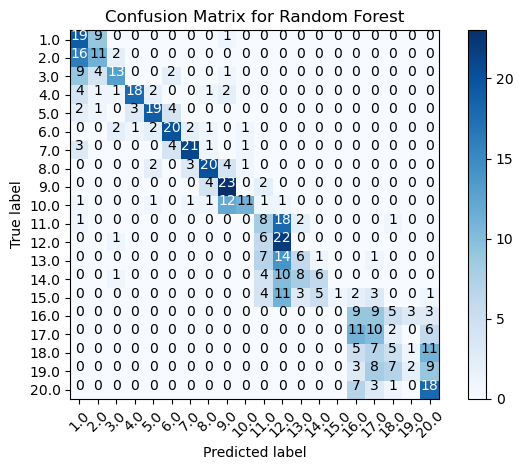

In [ ]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(df1_target_test, df1_rf_pred)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
class_names = label_encoder.classes_
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Random Forest')
plt.show()

### Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error

# Berechne den MSE
mse = mean_squared_error(df1_target_test, df1_rf_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.2414383561643834


### Classification Report (Recall and Precision)

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(df1_target_test, df1_rf_pred, target_names=label_encoder.classes_))

Classification Report:


TypeError: object of type 'numpy.float64' has no len()

### Cross Validation

In [ ]:
#Implement a cross validation split to get a better estimate about performance of used models.
#Example for Random Forrest

### Visual Evaluation (ROC Curves)

Classifiers necessary which deliver confidence scores of their predicitons. It has to be possible to apply the  ```predict_proba()``` function.

# Modell 2

In [169]:
#Modell 2

df2 = pd.read_csv('../data/processed/export_2018_v1.csv') #Auch von 2018-2024
 

In [170]:
# Zeile mit dem höchsten Jahr
max_year_entry = df2[df2['year'] == df2['year'].max()]
print("Zeile mit dem höchsten Jahr:")
display(max_year_entry)

# Zeile mit dem niedrigsten Jahr
min_year_entry = df2[df2['year'] == df2['year'].min()]
print("Zeile mit dem niedrigsten Jahr:")
display(min_year_entry)

KeyError: 'year'

# Modell 3 - Daten 1950-1996

Folgende Probleme: Viele NaN Werte bei Position

Welche attribute sollen wir nehmen? Es gibt quasi keine vernünftigen wie standings etc.

In [24]:
# Modell 3

df3 = pd.read_csv('../data/processed/export_v1.csv') #Daten von 1950-2024

/var/folders/gt/wnv6zp0s7w92jy1_p2n6shsr0000gn/T/ipykernel_81176/2581890540.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('../data/processed/export_v1.csv') #Daten von 1950-2024


In [26]:
# Wähle nur den Teil des df3, der in der Spalte 'year' Werte zwischen 1950-1996 hat
df3_filtered = df3[(df3['year'] >= 1950) & (df3['year'] <= 1996)]
df3_filtered.head()

,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,position,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season
4380,4381,224,71,3,5,2,1996,1,1,Australian Grand Prix,1996-03-10,\N,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:32.509,\N,\N,2.0,1960-09-17,British,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4381,4382,224,35,3,6,1,1996,1,1,Australian Grand Prix,1996-03-10,\N,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:32.371,\N,\N,1.0,1971-04-09,Canadian,VIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4382,4383,224,56,6,2,3,1996,1,1,Australian Grand Prix,1996-03-10,\N,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:32.889,\N,\N,3.0,1965-11-10,British,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4383,4384,224,77,22,4,7,1996,1,1,Australian Grand Prix,1996-03-10,\N,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:34.344,\N,\N,7.0,1959-08-27,Austrian,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4384,4385,224,57,1,7,5,1996,1,1,Australian Grand Prix,1996-03-10,\N,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:34.054,\N,\N,5.0,1968-09-28,Finnish,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Folgende Attribute für das Modell von 1950-1996

target: position

raceID, driverId, constuctorId, year, circuitId

grid, , race_date, q1, q2,q3, driver_nationality,

driver_dob --> age

race_location, race_lat, race_alt

In [28]:
# Wähle nur die angegebenen Spalten aus df3_filtered aus
df3_filtered_selected = df3_filtered[['position', 'raceId', 'driverId', 'constructorId', 'year', 'circuitId', 'grid', 'race_date', 'q1', 'q2', 'q3', 'driver_nationality', 'race_location', 'race_lat', 'race_alt']]
df3_filtered_selected.tail()

,position,raceId,driverId,constructorId,year,circuitId,grid,race_date,q1,q2,q3,driver_nationality,race_location,race_lat,race_alt
20318,NaN,728,410,172,1963,56,0,1963-12-28,NaN,NaN,NaN,South African,Eastern Cape Province,-33.0486,15
20319,NaN,728,305,26,1963,56,0,1963-12-28,NaN,NaN,NaN,British,Eastern Cape Province,-33.0486,15
24297,NaN,745,418,172,1961,46,15,1961-10-08,NaN,NaN,NaN,American,New York State,42.3369,485
24298,NaN,717,373,172,1964,46,1,1964-10-04,NaN,NaN,NaN,British,New York State,42.3369,485
24299,NaN,633,333,199,1971,49,18,1971-04-18,NaN,NaN,NaN,Italian,Barcelona,41.3664,79


In [52]:
df3.head()

,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,position,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season
0,1,18,1,1,22,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:26.572,1:25.187,1:26.714,1.0,1985-01-07,British,HAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18,2,2,3,5,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:25.960,1:25.518,1:27.236,5.0,1977-05-10,German,HEI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18,3,3,7,7,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:26.295,1:26.059,1:28.687,7.0,1985-06-27,German,ROS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18,4,4,5,11,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:26.907,1:26.188,\N,12.0,1981-07-29,Spanish,ALO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18,5,1,23,3,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,Melbourne,Australia,-37.8497,144.968,10,1:25.664,1:25.452,1:27.079,3.0,1981-10-19,Finnish,KOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ensembles

Let the different models vote for final prediction.

Possabilities: 
Stacking,
Voting

### Stacking

Stacking example for the Random Forrest and Naive Bayes Classifier with a Decision Tree classifier as the meta classifier.

In [ ]:
#Stacking Example for Naive Bayes and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier

estimators = {'RandomForrest': RandomForestClassifier(max_depth=2, random_state=0), 'NaiveBayes': GaussianNB()} #Possible to extend to even more classifiers

encoder = LabelEncoder()
df_target_train_encoded = encoder.fit_transform(df_target_train)
df_target_test_encoded = encoder.transform(df_target_test)

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, df_train_wo_target, df_target_train_encoded, df_test_wo_target, df_target_test)

#Does it improve accuracy?